#数値計算最終レポート



##問題説明
三体問題（three-body problem）とは、互いに重力相互作用する三質点系の運動がどのようなものかを問う問題である。


第 $i=1,2,3$ 体の運動方程式は、その座標を $\mathbf{r}_i$ 、 質量を $m_{i}$ とするとき、次式により与えられる。

$$
m_i \frac{d^2 \mathbf{r}_i}{dt^2} = - \sum_{\substack{j \neq i}} G m_i m_j \frac{ (\mathbf{r}_i - \mathbf{r}_j)}{\|\mathbf{r}_i - \mathbf{r}_j\|^3}
$$

ここに $t$ は時刻、$G$ は重力定数である。

このレポートは、初期値が与えられた場合に、三体問題の運動方程式をルンゲ・クッタ・フェールベルグ法により数値的に解き、その結果の可視化を行う。

*このプログラムを全部実行するには10分ほどかかる。



In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML, display

##課題1
三体問題の解のうち**周期解**（ある時間Tが経過するともとの配位に戻る解）がある。

ここでは、<br>
M. Suvakov and V. Dmitrasinovic, **Three Classes of Newtonian Three-Body Planar Periodic Orbits**, 2013<br>による平面三体問題の**周期解**を確認する。
初期値は以下に設定され、$v_{ax}$と$v_{ay}$の値だけ変えることで、いろいろな周期解があげられている。その中の三つのグラフと動画を作成し、周期になることを確認する。
$$r_{ax}= -r_{bx}= -1, \quad r_{cx}= 0\\
r_{ay}= r_{by}= r_{cy}= 0\\
v_{bx}= v_{ax},\quad v_{cx}= -2v_{ax}\\
v_{by}= v_{ay},\quad v_{cy}= -2v_{ay}$$

**(1)** Butterfly_I型: $v_{ax} = 0.30689, v_{ay}= 0.12551$<br>
**(2)** Yin-Yang_I型: $v_{ax} = 0.51394, v_{ay}= 0.30474$<br>
**(3)** Dragonfly型: $v_{ax} = 0.08058, v_{ay}= 0.58884$



In [ ]:

# 初期値を設定する関数(位置と速度)
def initial_x(ix, iy):
  return [-1, 0, ix, iy,
      1, 0, ix, iy,
      0, 0, -2*ix, -2*iy]


In [ ]:
# 微分方程式の定義
def f(t, x):
    rax, ray, vax, vay, rbx, rby, vbx, vby, rcx, rcy, vcx, vcy = x

    #　速度
    drax, dray = vax, vay
    drbx, drby = vbx, vby
    drcx, drcy = vcx, vcy

    #　距離
    len_ab = np.sqrt((rax - rbx) ** 2 + (ray - rby) ** 2)
    len_bc = np.sqrt((rbx - rcx) ** 2 + (rby - rcy) ** 2)
    len_ca = np.sqrt((rcx - rax) ** 2 + (rcy - ray) ** 2)

    #　加速度
    dvax = G * (mb * (rbx - rax) / len_ab ** 3 + mc * (rcx - rax) / len_ca ** 3)
    dvay = G * (mb * (rby - ray) / len_ab ** 3 + mc * (rcy - ray) / len_ca ** 3)
    dvbx = G * (mc * (rcx - rbx) / len_bc ** 3 + ma * (rax - rbx) / len_ab ** 3)
    dvby = G * (mc * (rcy - rby) / len_bc ** 3 + ma * (ray - rby) / len_ab ** 3)
    dvcx = G * (ma * (rax - rcx) / len_ca ** 3 + mb * (rbx - rcx) / len_bc ** 3)
    dvcy = G * (ma * (ray - rcy) / len_ca ** 3 + mb * (rby - rcy) / len_bc ** 3)

    return [drax, dray, dvax, dvay,
            drbx, drby, dvbx, dvby,
            drcx, drcy, dvcx, dvcy]

In [ ]:
# 解の計算(関数化)
# rtol(相対許容誤差)をデフォルトに設定すると、精度が足りない場合があるため、パラメータとして与える

def solve(t_span, x0, rtol = 1e-3, atol = 1e-6):
    sol = solve_ivp(f, t_span, x0,    # 微分方程式、時間範囲、初期値
                method='RK45',  # ルンゲ・クッタ・フェールベルグ法
                rtol = rtol,  # 相対許容誤差
                atol = atol  # 絶対許容誤差
               )
    df = pd.DataFrame(sol.y.T, columns=['rax', 'ray', 'vax', 'vay', 'rbx', 'rby', 'vbx', 'vby', 'rcx', 'rcy', 'vcx', 'vcy'])
    return df


In [ ]:

# 可視化(関数化)
import matplotlib.pyplot as plt
def plot_sol(df,name = 'Three-Body Problem Animation'):

  plt.figure(figsize=(8, 6))



  plt.plot(df['rax'], df['ray'], 'r.-')
  plt.plot(df['rbx'], df['rby'], 'b.-')
  plt.plot(df['rcx'], df['rcy'], 'g.-')


  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  plt.title(name)
  plt.show()


In [ ]:
# 動画化
# type0: "足跡を残す"とtype1: "足跡を残さない"の2種類の動画に選択できる
def MakeAnimation(df, i, type=0,name = 'Three-Body Problem Animation'):

  plt.rcParams['animation.embed_limit'] = 50.0

  fig, ax = plt.subplots(figsize=(8, 6))

  # xlimとylimを位置座標の最大・最小値で設定する
  max_value_x = df.iloc[:, [0, 4, 8]].max().max()
  max_value_y = df.iloc[:, [1, 5, 9]].max().max()
  min_value_x = df.iloc[:, [0, 4, 8]].min().min()
  min_value_y = df.iloc[:, [1, 5, 9]].min().min()
  ax.set_xlim(min_value_x-0.1, max_value_x+0.1)
  ax.set_ylim(min_value_y-0.1, max_value_y+0.1)


  ax.set_xlabel('X-axis')
  ax.set_ylabel('Y-axis')
  ax.set_title(name)


  line_a, = ax.plot([], [], 'r.-', label='Body A')
  line_b, = ax.plot([], [], 'b.-', label='Body B')
  line_c, = ax.plot([], [], 'g.-', label='Body C')


  def update(frame):
    if(type == 0):
      n_tail = i
      start_idx = frame * i

      line_a.set_data(df.iloc[:start_idx+n_tail, 0], df.iloc[:start_idx+n_tail, 1])
      line_b.set_data(df.iloc[:start_idx+n_tail, 4], df.iloc[:start_idx+n_tail, 5])
      line_c.set_data(df.iloc[:start_idx+n_tail, 8], df.iloc[:start_idx+n_tail, 9])
    else:
      n_tail = 30
      start_idx = frame * i

      line_a.set_data(df.iloc[start_idx:start_idx+n_tail, 0], df.iloc[start_idx:start_idx+n_tail, 1])
      line_b.set_data(df.iloc[start_idx:start_idx+n_tail, 4], df.iloc[start_idx:start_idx+n_tail, 5])
      line_c.set_data(df.iloc[start_idx:start_idx+n_tail, 8], df.iloc[start_idx:start_idx+n_tail, 9])
    return line_a, line_b, line_c


  num_frames = df.shape[0] // i
  ani = animation.FuncAnimation(fig, update, frames=num_frames, interval=100, blit=True)

  display(HTML(ani.to_jshtml()))
  plt.close()

###考察
xlim, ylimの設定について、グラフの場合、自動的に設定されたら大体の場合大丈夫が、動画の場合は手で設定する必要がある。

##課題2
今まで2次元での3体問題のモデルについて考えた。
**3次元**のグラフや動画を見てみたいため、3次元でのモデルを考えてみた。

In [ ]:
def initial_x_3d(ix, iy):
  return [-1, 0, 0, ix, iy, 0,
      1, 0, 0, ix, iy, 0,
      0, 0, 0, -2*ix, -2*iy, 0]

In [ ]:
def f_3d(t, x):
    rax, ray, raz, vax, vay, vaz, rbx, rby, rbz, vbx, vby, vbz, rcx, rcy, rcz, vcx, vcy, vcz = x

    drax, dray, draz = vax, vay, vaz
    drbx, drby, drbz = vbx, vby, vbz
    drcx, drcy, drcz = vcx, vcy, vcz


    len_ab = np.sqrt((rax - rbx) ** 2 + (ray - rby) ** 2 + (raz - rbz) ** 2)
    len_bc = np.sqrt((rbx - rcx) ** 2 + (rby - rcy) ** 2 + (rbz - rcz) ** 2)
    len_ca = np.sqrt((rcx - rax) ** 2 + (rcy - ray) ** 2 + (rcz - raz) ** 2)


    dvax = G * (mb * (rbx - rax) / len_ab ** 3 + mc * (rcx - rax) / len_ca ** 3)
    dvay = G * (mb * (rby - ray) / len_ab ** 3 + mc * (rcy - ray) / len_ca ** 3)
    dvaz = G * (mb * (rbz - raz) / len_ab ** 3 + mc * (rcz - raz) / len_ca ** 3)

    dvbx = G * (mc * (rcx - rbx) / len_bc ** 3 + ma * (rax - rbx) / len_ab ** 3)
    dvby = G * (mc * (rcy - rby) / len_bc ** 3 + ma * (ray - rby) / len_ab ** 3)
    dvbz = G * (mc * (rcz - rbz) / len_bc ** 3 + ma * (raz - rbz) / len_ab ** 3)

    dvcx = G * (ma * (rax - rcx) / len_ca ** 3 + mb * (rbx - rcx) / len_bc ** 3)
    dvcy = G * (ma * (ray - rcy) / len_ca ** 3 + mb * (rby - rcy) / len_bc ** 3)
    dvcz = G * (ma * (raz - rcz) / len_ca ** 3 + mb * (rbz - rcz) / len_bc ** 3)

    return [drax, dray, draz, dvax, dvay, dvaz,
            drbx, drby, drbz, dvbx, dvby, dvbz,
            drcx, drcy, drcz, dvcx, dvcy, dvcz]

In [ ]:
# 解の計算(3d)
def solve_3d(t_span, x0, rtol = 1e-3, atol = 1e-6):
    sol = solve_ivp(f_3d, t_span, x0, method='RK45',
                    rtol = rtol
                    )
    df = pd.DataFrame(sol.y.T, columns=['rax', 'ray', 'raz', 'vax', 'vay', 'vaz', 'rbx', 'rby', 'rbz', 'vbx', 'vby', 'vbz', 'rcx', 'rcy', 'rcz', 'vcx', 'vcy', 'vcz'])
    return df

In [ ]:
# 可視化(3d)
def plot_sol_3d(df, xlim=None, ylim=None, zlim=None,name = 'Three-Body Problem Animation'):

  fig = plt.figure(figsize=(10, 10))

  ax = fig.add_subplot(111, projection='3d')
  if xlim is not None:
    ax.set_xlim(xlim[0], xlim[1])
  if ylim is not None:
    ax.set_ylim(ylim[0], ylim[1])
  if zlim is not None:
    ax.set_zlim(zlim[0], zlim[1])
  ax.plot(df['rax'], df['ray'], df['raz'], label='Particle A')
  ax.plot(df['rbx'], df['rby'], df['rbz'], label='Particle B')
  ax.plot(df['rcx'], df['rcy'], df['rcz'], label='Particle C')

  ax.set_xlabel('X-axis')
  ax.set_ylabel('Y-axis')
  ax.set_zlabel('Z-axis')
  ax.set_title(name)
  ax.legend()

  plt.show()

In [ ]:
#　動画化(3d)
#　type0: 足跡を残す
#　type1: 足跡を残さない
#　i: 1回あたりのフレーム数(小さい値に設定すると運動の過程をはっきり見えるが、10以下に設定するとメモリーが足りなくなる可能性が生じる)
def MakeAnimation_3d(df, i=50, type=0,name = 'Three-Body Problem Animation'):
  plt.rcParams['animation.embed_limit'] = 50.0

  fig = plt.figure(figsize=(8, 8))
  ax = fig.add_subplot(111, projection='3d')

  max_value_x = df.iloc[:, [0, 6, 12]].max().max()
  max_value_y = df.iloc[:, [1, 7, 13]].max().max()
  max_value_z = df.iloc[:, [2, 8, 14]].max().max()
  min_value_x = df.iloc[:, [0, 6, 12]].min().min()
  min_value_y = df.iloc[:, [1, 7, 13]].min().min()
  min_value_z = df.iloc[:, [2, 8, 14]].min().min()

  ax.set_xlim(min_value_x-0.1, max_value_x+0.1)
  ax.set_ylim(min_value_y-0.1, max_value_y+0.1)
  ax.set_zlim(min_value_z-0.1, max_value_z+0.1)


  ax.set_xlabel('X-axis')
  ax.set_ylabel('Y-axis')
  ax.set_zlabel('Z-axis')
  ax.set_title(name)


  line_a, = ax.plot([], [], [], 'b.-', label='Body A')
  line_b, = ax.plot([], [], [], 'r.-', label='Body B')
  line_c, = ax.plot([], [], [], 'g.-', label='Body C')


  def update(frame):
    if(type == 0):
      n_tail = i
      start_idx = frame * i

      line_a.set_data_3d(df.iloc[:start_idx+n_tail, 0], df.iloc[:start_idx+n_tail, 1], df.iloc[:start_idx+n_tail, 2])
      line_b.set_data_3d(df.iloc[:start_idx+n_tail, 6], df.iloc[:start_idx+n_tail, 7], df.iloc[:start_idx+n_tail, 8])
      line_c.set_data_3d(df.iloc[:start_idx+n_tail, 12], df.iloc[:start_idx+n_tail, 13], df.iloc[:start_idx+n_tail, 14])
    else:
      n_tail = 30
      start_idx = frame * i

      line_a.set_data_3d(df.iloc[start_idx:start_idx+n_tail, 0], df.iloc[start_idx:start_idx+n_tail, 1], df.iloc[start_idx:start_idx+n_tail, 2])
      line_b.set_data_3d(df.iloc[start_idx:start_idx+n_tail, 6], df.iloc[start_idx:start_idx+n_tail, 7], df.iloc[start_idx:start_idx+n_tail, 8])
      line_c.set_data_3d(df.iloc[start_idx:start_idx+n_tail, 12], df.iloc[start_idx:start_idx+n_tail, 13], df.iloc[start_idx:start_idx+n_tail, 14])

    return line_a, line_b, line_c


  num_frames = df.shape[0] // i
  ani = animation.FuncAnimation(fig, update, frames=num_frames, interval=80, blit=True)

  display(HTML(ani.to_jshtml()))
  plt.close()

In [ ]:
# 定数や初期条件の定義
G = 1        # 重力定数
ma, mb, mc = 1,1,1        # 質量

準備は以上となる。

ここからはM. Suvakov and V. Dmitrasinovic, **Three Classes of Newtonian Three-Body Planar Periodic Orbits**, 2013<br>による平面三体問題の**周期解**を確認する。変更するパラメータは、$v_{ax}, v_{ay}$のみである。

**(1)** Butterfly_I型: $v_{ax} = 0.30689, v_{ay}= 0.12551$<br>
**(2)** Yin-Yang_I型: $v_{ax} = 0.51394, v_{ay}= 0.30474$<br>
**(3)** Yarn型: $v_{ax} = 0.55906, v_{ay}= 0.34919$<br>
**(4)** Dragonfly型: $v_{ax} = 0.08058, v_{ay}= 0.58884$

(1000, 12)


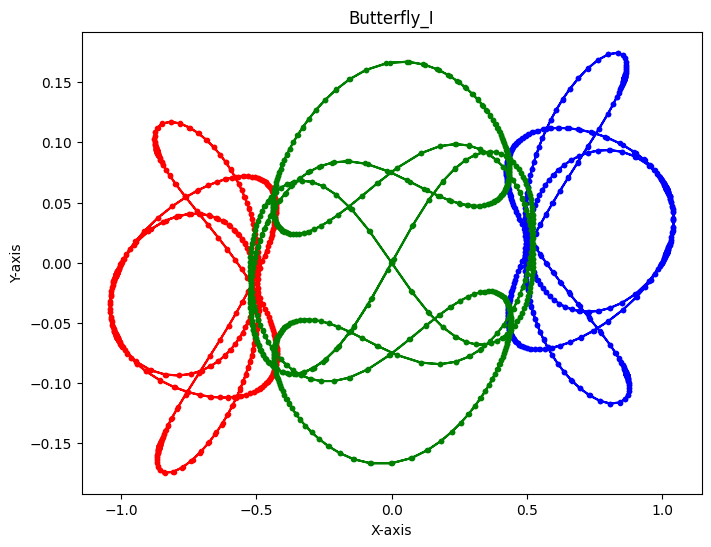

In [ ]:
#パターン01（Butterfly_I型）
ix = 0.30689  #Butterfly_I型のraxを設定
iy = 0.12551  #rayを設定
x0 = initial_x(ix, iy)
t_span = (0, 13) # 時間の範囲
df = solve(t_span, x0, 1e-9)
#print(df.head())
print(df.shape)
plot_sol(df,'Butterfly_I')

(275, 12)


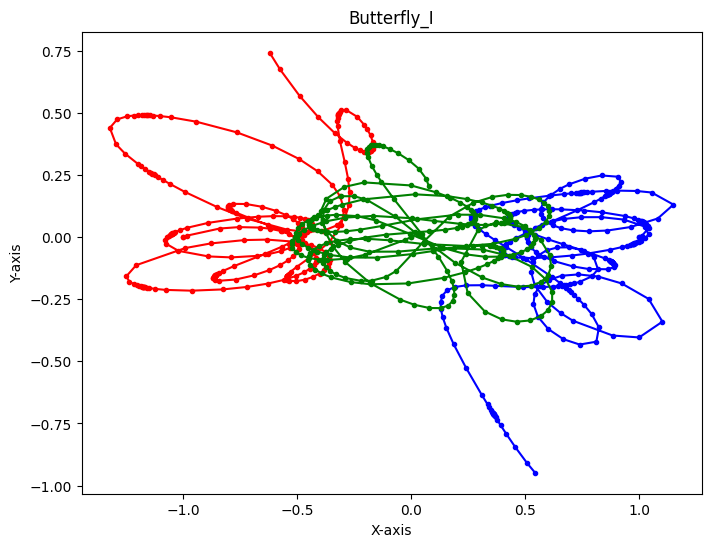

In [ ]:
# パターン01のパラメータの中に、rtolのみ変更してみる
# rtolを1e-9ｋからデフォルト値(1e-3)に変えると、精度足りなくなる
ix = 0.30689
iy = 0.12551
x0 = initial_x(ix, iy)
t_span = (0, 13) # 時間の範囲
df_n = solve(t_span, x0)
print(df_n.shape)
plot_sol(df_n,'Butterfly_I')

###考察
"solve_ivp"関数のrtol(相対許容誤差)というパラメータが大事。デフォルトの$e^{-3}$だと精度が足りないため、グラフが想定の様子にならない場合がある。

In [ ]:
#パターン01動画化(足跡を残さない)
MakeAnimation(df,10,1,'Butterfly_I_Animation_1')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#パターン01動画化(足跡を残す)
#MakeAnimation(df,10,0,'Butterfly_I_Animation_2')

(1525, 18)


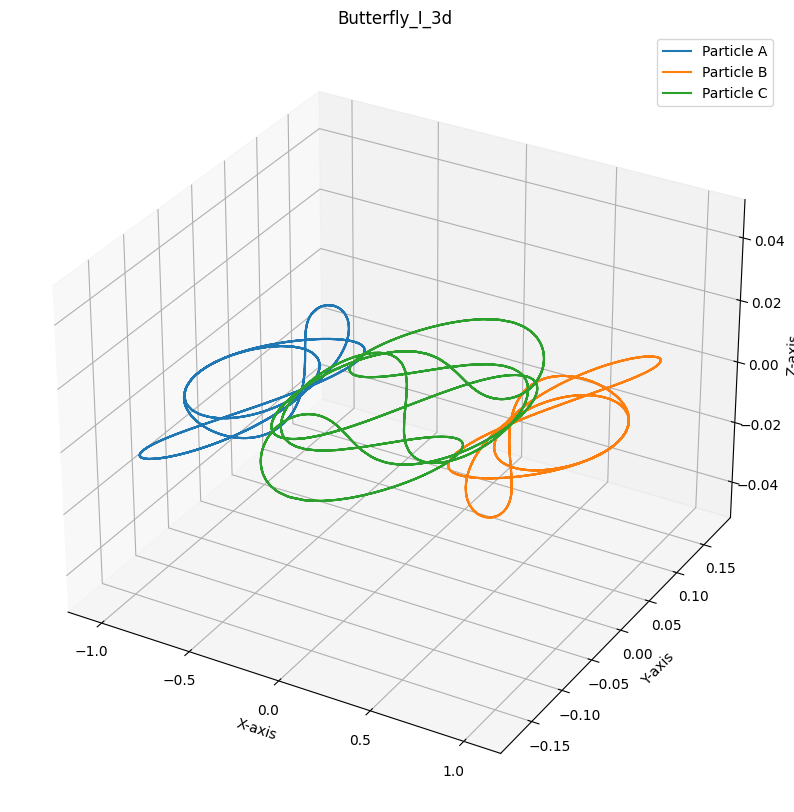

In [ ]:
#パターン01（3D Plot）
ix = 0.30689
iy = 0.12551
x0_3d = initial_x_3d(ix, iy)
t_span = (0, 20) # 時間の範囲
df_3d = solve_3d(t_span, x0_3d, 1e-10, 1e-10)
print(df_3d.shape)
plot_sol_3d(df_3d,name='Butterfly_I_3d')

###考察
z軸上の初期値(位置と速度)が全部0であるため3次元でグラフを描いてもあまり意味がないと感じた。
z軸上の初期値を変えたら周期解にならない。


In [ ]:
#パターン01　3D動画化
#MakeAnimation_3d(df_3d,12,1,'Butterfly_I_3d_Animation')

In [ ]:
#　パターン02（yin-yang I）
#ix_02 = 0.51394
#iy_02 = 0.30474
#x0_02 = initial_x(ix_02, iy_02)
#t_span = (0, 35) # 時間の範囲
#df_02 = solve(t_span, x0_02, 1e-8, 1e-8)
#print(df_02.shape)
#plot_sol(df_02,'yin-yang_I')

In [ ]:
#パターン02　動画
#MakeAnimation(df_02,7,0,[-1.5,1.5],[-1.2,1.2],'yin-yang_I_Animation')

In [ ]:
#パターン03（Yarn）
#ix_03 = 0.55906
#iy_03 = 0.34919
#x0_03 = initial_x(ix_03, iy_03)

#t_span = (0, 100) # 時間の範囲
#df_03 = solve(t_span, x0_03, 1e-9)
#print(df_03.shape)
#plot_sol(df_03,name='Yarn')

In [ ]:
#パターン03　動画
#MakeAnimation(df_03,10,0,[-1.6,1.6],[-1.6,1.6],'yin-yang_I_Animation')

In [ ]:
#パターン04（Dragonfly）
#ix_04 = 0.08058
#iy_04 = 0.58884
#x0_04 = initial_x(ix_04, iy_04)

#t_span = (0, 42) # 時間の範囲
#df_04 = solve(t_span, x0_04, 1e-9)
#print(df_04.shape)
#plot_sol(df_04,name='Dragonfly')

In [ ]:
#パターン04　動画
#MakeAnimation(df_04,9,0,'Dragonfly_Animation')

##課題3
特殊な三体問題のうち、もう一つ有名なのは、**ピタゴラス三体問題**である。質量比3:4:5の質点が3:4:5の直角三角形の各頂点に置かれた場合の系の進化を問う問題である。

初期条件として、$$G=1,m_a=3,m_b=4,m_c=5$$
とする。各粒子の初期座標は次のように設定する。
$$\textbf{x}_a = (0,0,0) \\ \textbf{x}_b = (2,\sqrt5,0)\\ \textbf{x}_c = (2,\sqrt5,4)$$
また、各粒子の速度は初期時刻においてすべてゼロとする。
$$\textbf{v}_a = \textbf{v}_b = \textbf{v}_c = \textbf{0}$$


In [ ]:
# 初期条件
G = 1     # 重力定数
ma, mb, mc = 3, 4, 5        # 質量
x0_py = np.array([0, 0, 0, 0, 0, 0,
          2, 2.2360679775, 0, 0, 0, 0,
          2, 2.2360679775, 4, 0, 0, 0]) # 初期状態（位置座標と速度）

In [ ]:
t_span = (0, 70) # 時間の範囲
df_py = solve_3d(t_span, x0_py, 1e-10, 1e-10)
print(df_py.shape)

(2360, 18)


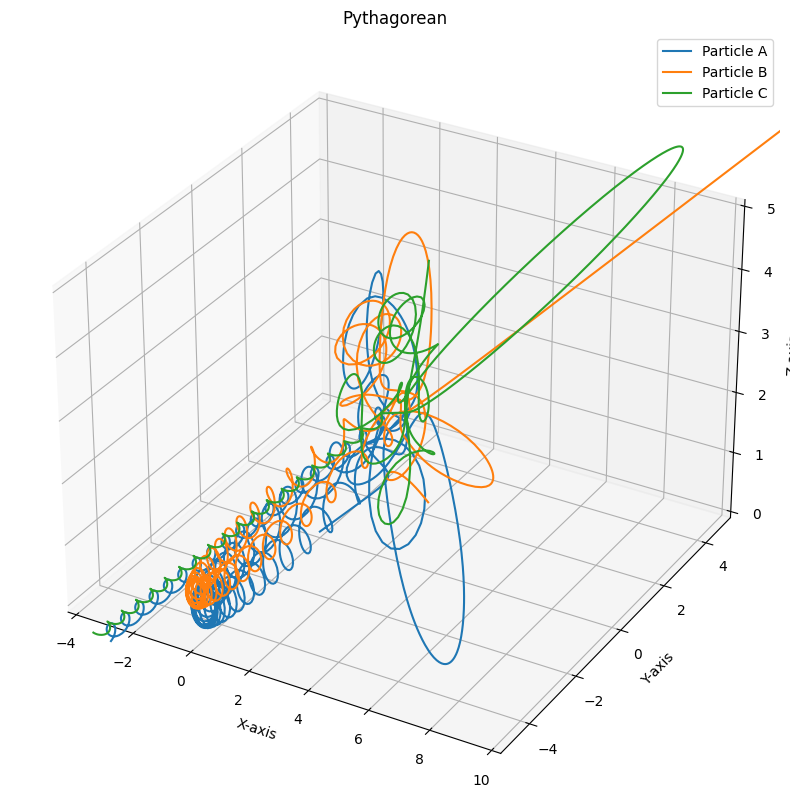

In [ ]:
plot_sol_3d(df_py,[-4,10],[-5,5],[0,5],'Pythagorean')

In [ ]:
#MakeAnimation_3d(df_py,16,0,'Pythagorean Animation')

###考察
時刻60sで緑惑星と赤い-青い惑星がすれ違った後に、緑惑星は十分な脱出速度を獲得し無限遠へエスケープし、赤いと青い惑星は連星を組んだまま反対方向へと向かう。